<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Hands_On_Implementation_of_Feature_Selection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib seaborn --user -q --no-warn-script-location


  Preparing metadata (setup.py) ... done


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn import datasets

In [5]:
# Reading the dataset
from sklearn import datasets

data = datasets.load_boston()

In [6]:
#Load the data
import pandas as pd
import numpy as np

df = pd.DataFrame(data.data) 

#Providing Feature names
df.columns = data.feature_names 

#Providing Target
df_target = np.asarray(data.target) 
df["MEDV"] = pd.Series(df_target)

In [7]:
# Visualizing the samples
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Checking shape of the dataset
df.shape

(506, 14)

In [9]:
# Defining input features (X) and output feature (y)

# input 
X = df.iloc[:, :-1] 
# output 
Y = df.iloc[:, -1] 

In [10]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', Y.shape)

Shape of the input features: (506, 13)
Shape of the output features: (506,)


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
#Converting data to integer
X1 = X.astype(int)
Y1 = Y.astype(int)

In [13]:
#Features with highest chi-squared statistics
model = SelectKBest(chi2, k=5)
X_new = model.fit_transform(X1,Y1)
print("No. of Features:", X_new.shape)

No. of Features: (506, 5)


In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
# Checking the shape of input features
X.shape

(506, 13)

In [16]:
#Removing features based on the threshold
model = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))

X_new = model.fit_transform(X)

#Checking the shape of input features after feature selection
print("No. of Features:", X_new.shape)

No. of Features: (506, 11)


In [17]:
X_new

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
#Defining a Lasso model 
from sklearn.linear_model import Lasso

# Model building 
lasso = Lasso() 
lasso = lasso.fit(X, Y) 

#Creating a DataFrame
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
lasso_coeff

,Columns,Coefficient Estimate
0,CRIM,-0.063437
1,ZN,0.049165
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.949811
6,AGE,0.020910
7,DIS,-0.668790
8,RAD,0.264206
9,TAX,-0.015212


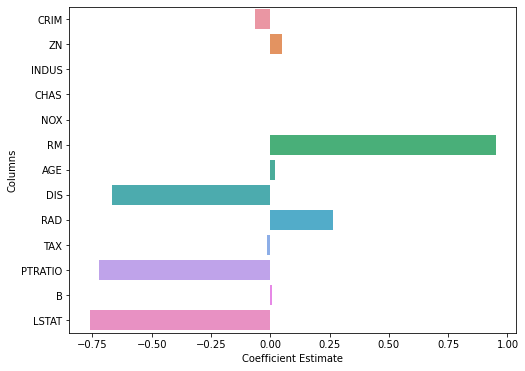

In [19]:
#Visualizing a Barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

In [20]:
#Defining SelectFromModel 
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(lasso, prefit = True)
new_features = model.transform(X)

In [21]:
#Printing the shape after removing features
new_features.shape

(506, 10)

In [22]:
#Defining a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

#Model building 
RFR = RandomForestRegressor()
RFR = RFR.fit(X,Y)

#Creating a DataFrame
new_X = pd.DataFrame()
new_X["Columns"] = X.columns 
new_X['Feature_Importance'] = pd.Series(RFR.feature_importances_)
new_X

,Columns,Feature_Importance
0,CRIM,0.039250
1,ZN,0.001097
2,INDUS,0.006760
3,CHAS,0.001121
4,NOX,0.021433
5,RM,0.415488
6,AGE,0.013122
7,DIS,0.070361
8,RAD,0.003016
9,TAX,0.013731


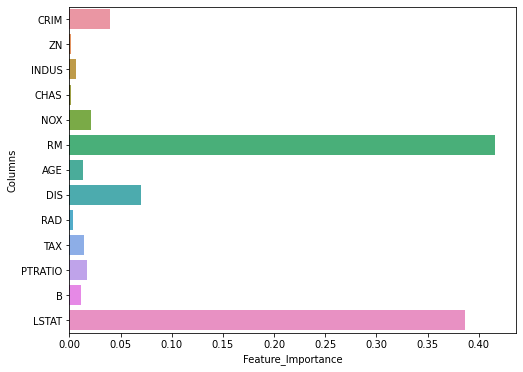

In [23]:
#Visualizing a Barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='Feature_Importance' , y='Columns', data= new_X)

In [24]:
#Defining SelectFromModel 
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(RFR, prefit = True)
new_features = model.transform(X)

In [25]:
#Printing the shape after removing features
new_features.shape

(506, 2)